# Computational and Numerical Methods
## Group 16
### Set 6 (10-09-2018):   Lagrange and Newton Interpolation
#### Vidhin Parmar   201601003
#### Parth Shah      201601086

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.interpolate import lagrange as l
from sympy import *

def plot(x, y,lab):
    plt.plot(x, y, label=lab)
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()
    
def lag(x, y, xp, laglab):
    poly = l(x, y)
    plt.plot(xp, poly(xp), label=laglab)
    plt.grid(True)
    plt.legend(loc='best')
    print("The Lagrangian polynomial is:")
    print(poly)
    
def lagwithfunc(f, x, y, xp, lab):
    poly = l(x, y)
    plt.plot(xp, f(xp), label = lab)
    plt.plot(xp, poly(xp), label="Lagrange Polynomial")
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()
    print("The Lagrangian polynomial is:")
    print(poly)

def divdifcoef(x, y):
    '''x : array of data points
       y : array of f(x)  '''
    x.astype(float)
    y.astype(float)
    n = len(x)
    a = []
    for i in range(n):
        a.append(y[i])
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            a[i] = float(a[i]-a[i-1])/float(x[i]-x[i-j])

    return np.array(a) # array of coefficients

def divdifEval(a, x, r):
    ''' a : array returned by function coef()
        r : the node to interpolate at  '''
    
    x.astype(float)
    n = len( a ) - 1
    temp = a[n]
    for i in range( n - 1, -1, -1 ):
        temp = temp * ( r - x[i] ) + a[i]
    return temp # y_value interpolation

# Q1: $\sqrt{x}$

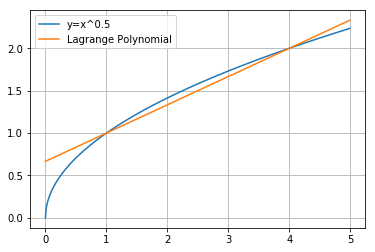

The Lagrangian polynomial is:
 
0.3333 x + 0.6667


In [2]:
f = lambda x: x**0.5
lagwithfunc(f, np.array([1, 4]), np.array([1, 2]), np.arange(0,5,0.01), "y=x^0.5")

# Q2: $e^{x}$

The Lagrangian polynomial is:
 
2.282 x + 0.3993
The Lagrangian polynomial is:
       2
1.145 x + 0.3926 x + 1.179


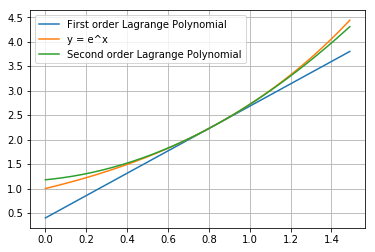

In [3]:
xp = np.arange(0, 1.5, 0.01)
lag(np.array([0.82, 0.83]), np.array([2.270500, 2.293319]), xp, "First order Lagrange Polynomial")
plt.plot(xp, np.exp(xp), label="y = e^x")
lag(np.array([0.82, 0.83, 0.84]), np.array([2.270500, 2.293319,2.316367]), xp, "Second order Lagrange Polynomial")
plt.show()

# Q3

The Lagrangian polynomial is:
   2
4 x - 4 x - 1


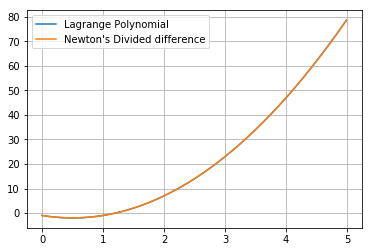

Newton's divided difference coefficients are:
[-1.  0.  4.]


In [4]:
lag(np.array([0, 1, 2]), np.array([-1, -1, 7]), np.arange(0,5,0.01), "Lagrange Polynomial")
x = np.array([0, 1, 2])

a = divdifcoef(x, np.array([-1, -1, 7]))
xp = np.arange(0,5,0.01)
plt.plot(xp, divdifEval(a, x, xp), label = "Newton's Divided difference")
plt.grid(True)
plt.legend(loc='best')
plt.show()
print("Newton's divided difference coefficients are:")
print(a)

We see that the interpolating function turns out to be the same for the Lagrange method and the Newton Divided Difference method.

# Q4 Interpolation of $\frac{1}{x}$:

The Lagrangian polynomial is:
 
-0.08778 x + 0.5926
Linear Newton's divided difference coefficients are:
[ 0.298507 -0.08778 ]


The Lagrangian polynomial is:
         2
0.02493 x - 0.2561 x + 0.8766
Quadratic Newton's divided difference coefficients are:
[ 0.298507   -0.08778     0.02493333]


The Lagrangian polynomial is:
           3          2
-0.006133 x + 0.0878 x - 0.4708 x + 1.121
Cubic Newton's divided difference coefficients are:
[ 0.298507   -0.08778     0.02493333 -0.00613333]


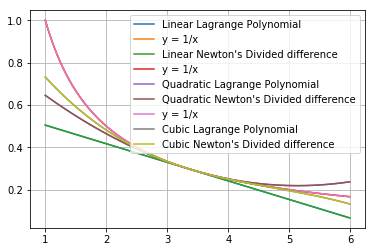

In [5]:
xp = np.arange(1, 6, 0.01)
x = np.array([3.35, 3.4, 3.5, 3.6])
y = np.array([0.298507, 0.294118, 0.285714, 0.277778])
lag(x[0:2], y[0:2], xp, "Linear Lagrange Polynomial")
plt.plot(xp, 1/xp, label="y = 1/x")
a = divdifcoef(x[0:2], y[0:2])
plt.plot(xp, divdifEval(a, x[0:2], xp), label = "Linear Newton's Divided difference")
print("Linear Newton's divided difference coefficients are:")
print(a)
print("\n")

plt.plot(xp, 1/xp, label="y = 1/x")
lag(x[0:3], y[0:3], xp, "Quadratic Lagrange Polynomial")
a = divdifcoef(x[0:3], y[0:3])
plt.plot(xp, divdifEval(a, x[0:3], xp), label = "Quadratic Newton's Divided difference")
print("Quadratic Newton's divided difference coefficients are:")
print(a)
print("\n")

plt.plot(xp, 1/xp, label="y = 1/x")
lag(x[0:4], y[0:4], xp, "Cubic Lagrange Polynomial")
a = divdifcoef(x[0:4], y[0:4])
plt.plot(xp, divdifEval(a, x[0:3], xp), label = "Cubic Newton's Divided difference")
print("Cubic Newton's divided difference coefficients are:")
print(a)
plt.grid(True)
plt.legend(loc='best')
plt.show()

Lagrange interpolation is mostly just useful for theory. Computing with it requires huge numbers and catastrophic cancellations. In floating point arithmetic this is very bad. It does have some small advantages: for instance, the Lagrange approach amounts to diagonalizing the problem of finding the coefficients, so it takes only linear time to find the coefficients. This is good if you need to use the same set of points repeatedly. But all of these advantages do not make up for the problems associated with trying to actually evaluate a Lagrange interpolating polynomial.

With Newton interpolation, you get the coefficients reasonably fast (quadratic time), the evaluation is much more stable (roughly because there is usually a single dominant term for a given x), the evaluation can be done quickly and straightforwardly using Horner's method, and adding an additional node just amounts to adding a single additional term. It is also fairly easy to see how to interpolate derivatives using the Newton framework.

# Q5 

The Lagrangian polynomial is:
   2
1 x - 3 x + 2.5

x[0:3] Newton's divided difference coefficients are:
[ 2.5 -2.   1. ]


The Lagrangian polynomial is:
 
1.5

x[3:5] Newton's divided difference coefficients are:
[1.5 0. ]


The Lagrangian polynomial is:
 
-2.25 x + 9

x[5:7] Newton's divided difference coefficients are:
[ 1.125 -2.25 ]


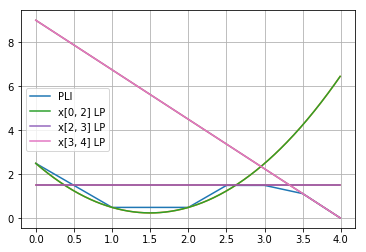

In [6]:
def lag(x, y, xp):
    poly = l(x, y)
    plt.plot(xp, poly(xp))
    plt.grid(True)
    plt.legend(loc='best')
    print("The Lagrangian polynomial is:")
    print(poly)
x = np.array([0, 1, 2, 2.5, 3, 3.5, 4])
y = np.array([2.5, 0.5, 0.5, 1.5, 1.5, 1.125, 0])
xp = np.arange(0, 4, 0.01)
yp = np.interp(xp, x, y)
plt.plot(xp, yp, label = "PLI")
lag(x[0:3], y[0:3], xp)
a = divdifcoef(x[0:3], y[0:3])
plt.plot(xp, divdifEval(a, x[0:3], xp), label= "x[0, 2] LP")
print()
print("x[0:3] Newton's divided difference coefficients are:")
print(a)
print("\n")

lag(x[3:5], y[3:5], xp)
a = divdifcoef(x[3:5], y[3:5])
plt.plot(xp, divdifEval(a, x[3:5], xp), label = "x[2, 3] LP")
print()
print("x[3:5] Newton's divided difference coefficients are:")
print(a)
print("\n")

lag(x[5:7], y[5:7], xp)
a = divdifcoef(x[5:7], y[5:7])
plt.plot(xp, divdifEval(a, x[5:7], xp), label= "x[3, 4] LP")
print()
print("x[5:7] Newton's divided difference coefficients are:")
print(a)
plt.grid(True)
plt.legend(loc='best')
plt.show()

## Now comparing with Piecewise Linear Interpolation

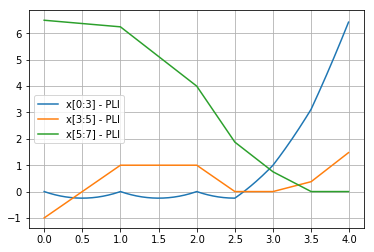

In [7]:
a = divdifcoef(x[0:3], y[0:3])
plt.plot(xp, divdifEval(a, x[0:3], xp) - yp, label = "x[0:3] - PLI")
a = divdifcoef(x[3:5], y[3:5])
plt.plot(xp, divdifEval(a, x[3:5], xp) - yp, label = "x[3:5] - PLI")
a = divdifcoef(x[5:7], y[5:7])
plt.plot(xp, divdifEval(a, x[5:7], xp) - yp, label = "x[5:7] - PLI")
plt.grid(True)
plt.legend(loc='best')
plt.show()

The Lagrange Polynomial/Newton Divided Difference is closest to the Piecewise Linear function in the interval in which the Polynomial is made i.e. The Lagrangian Polynomial made by taking two points is closest to the Piecewise Linear function between those points.